In [1]:
!pip install wget
import wget
wget.download("https://raw.githubusercontent.com/yogawicaksana/helper_prabowo/main/helper_prabowo_ml.py",
              out="helper_prabowo_ml.py")

!pip install transformers

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=47556e1fbb3c2483f4a1be26e628c90edf57caedd7f6abe21be56962115ce09e
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
!pip install tensorflow==2.16.1 tf-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 33.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalle

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings("ignore")

from helper_prabowo_ml import clean_html, remove_links, remove_special_characters, removeStopWords
from helper_prabowo_ml import remove_, remove_digits, lower, email_address, non_ascii, punct, hashtags

from wordcloud import WordCloud

import tensorflow as tf
from transformers import AutoTokenizer, TFAutoModel

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
train_df = pd.read_csv('train.csv')
train_df

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
20967,20968,Contemporary machine learning: a guide for pra...,Machine learning is finding increasingly bro...,1,1,0,0,0,0
20968,20969,Uniform diamond coatings on WC-Co hard alloy c...,Polycrystalline diamond coatings have been g...,0,1,0,0,0,0
20969,20970,Analysing Soccer Games with Clustering and Con...,We present a new approach for identifying si...,1,0,0,0,0,0
20970,20971,On the Efficient Simulation of the Left-Tail o...,The sum of Log-normal variates is encountere...,0,0,1,1,0,0


In [5]:
topics = ["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]

topic_to_class = {topic: idx for idx, topic in enumerate(topics)}

def determine_class(row):
    for topic, class_id in topic_to_class.items():
        if row[topic] == 1:
            return class_id
    return None

train_df['Class'] = train_df.apply(determine_class, axis=1)

train_df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,Class
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0,2
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0,2
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0,0


In [6]:
test_df = pd.read_csv('test.csv')
test_df

,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...
...,...,...,...
8984,29957,Supporting mixed-datatype matrix multiplicatio...,We approach the problem of implementing mixe...
8985,29958,An axiomatic basis for Blackwell optimality,In the theory of Markov decision processes (...
8986,29959,GeneVis - An interactive visualization tool fo...,GeneVis is a web-based tool to visualize com...
8987,29960,Quantifying the causal effect of speed cameras...,This paper quantifies the effect of speed ca...


In [7]:
train_df.drop(columns=topics, inplace=True, axis=1)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20972 entries, 0 to 20971
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        20972 non-null  int64 
 1   TITLE     20972 non-null  object
 2   ABSTRACT  20972 non-null  object
 3   Class     20972 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 655.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8989 entries, 0 to 8988
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        8989 non-null   int64 
 1   TITLE     8989 non-null   object
 2   ABSTRACT  8989 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.8+ KB


In [10]:
train_df.shape

(20972, 4)

In [11]:
test_df.shape

(8989, 3)

In [12]:
train_df.duplicated().sum()

0

In [13]:
test_df.duplicated().sum()

0

In [14]:
train_df = train_df.drop_duplicates()
train_df.shape

(20972, 4)

In [15]:
test_df = test_df.drop_duplicates()
test_df.shape

(8989, 3)

In [16]:
train_df.isna().sum()

ID          0
TITLE       0
ABSTRACT    0
Class       0
dtype: int64

In [17]:
test_df.isna().sum()

ID          0
TITLE       0
ABSTRACT    0
dtype: int64

In [18]:
train_df['text']=train_df['TITLE']+' '+train_df['ABSTRACT']
test_df['text']=test_df['TITLE']+' '+test_df['ABSTRACT']

In [19]:
train_df.drop(columns=['TITLE', 'ABSTRACT', 'ID'], inplace=True)
test_df.drop(columns=['TITLE', 'ABSTRACT', 'ID'], inplace=True)

In [20]:
train_df.head()

,Class,text
0,0,Reconstructing Subject-Specific Effect Maps ...
1,0,Rotation Invariance Neural Network Rotation ...
2,2,Spherical polyharmonics and Poisson kernels fo...
3,2,A finite element approximation for the stochas...
4,0,Comparative study of Discrete Wavelet Transfor...


In [21]:
test_df.head()

,text
0,Closed-form Marginal Likelihood in Gamma-Poiss...
1,Laboratory mid-IR spectra of equilibrated and ...
2,Case For Static AMSDU Aggregation in WLANs F...
3,The $Gaia$-ESO Survey: the inner disk intermed...
4,Witness-Functions versus Interpretation-Functi...


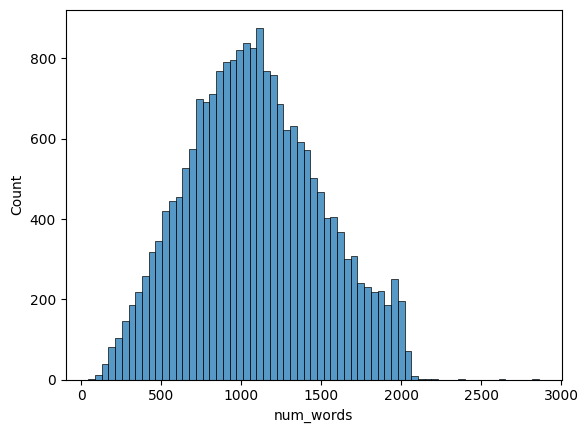

In [22]:
train_df['num_words'] = train_df.text.apply(len)
sns.histplot(train_df.num_words);

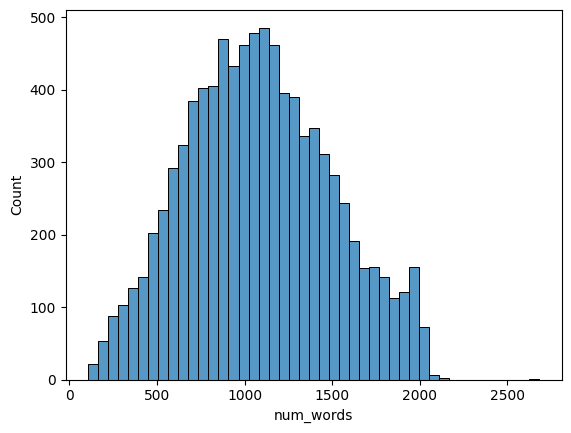

In [23]:
test_df['num_words'] = test_df.text.apply(len)
sns.histplot(test_df.num_words);

In [24]:
def text_preprocess(data,col):
    data[col] = data[col].apply(func=clean_html)
    data[col] = data[col].apply(func=remove_)
    data[col] = data[col].apply(func=removeStopWords)
    data[col] = data[col].apply(func=remove_digits)
    data[col] = data[col].apply(func=remove_links)
    data[col] = data[col].apply(func=remove_special_characters)
    data[col] = data[col].apply(func=punct)
    data[col] = data[col].apply(func=non_ascii)
    data[col] = data[col].apply(func=email_address)
    data[col] = data[col].apply(func=lower)
    return data

In [25]:
train_df = text_preprocess(train_df,'text')
train_df.head()

,Class,text,num_words
0,0,reconstructing subjectspecific effect maps pre...,1956
1,0,rotation invariance neural network rotation in...,548
2,2,spherical polyharmonics poisson kernels polyha...,739
3,2,finite element approximation stochastic maxwel...,875
4,0,comparative study discrete wavelet transforms ...,1003


In [26]:
test_df = text_preprocess(test_df,'text')
test_df.head()

,text,num_words
0,closedform marginal likelihood gammapoisson ma...,765
1,laboratory midir spectra equilibrated igneous ...,1041
2,case for static amsdu aggregation wlans frame ...,872
3,the gaiaeso survey inner disk intermediateage ...,1776
4,witnessfunctions versus interpretationfunction...,885


In [27]:
train_df.describe()

,Class,num_words
count,20972.000000,20972.000000
mean,1.073860,1083.001097
std,1.141853,414.600584
min,0.000000,42.000000
25%,0.000000,783.000000
50%,1.000000,1064.000000
75%,2.000000,1367.000000
max,5.000000,2861.000000


In [28]:
test_df.describe()

,num_words
count,8989.000000
mean,1082.812994
std,417.480060
min,107.000000
25%,777.000000
50%,1065.000000
75%,1373.000000
max,2683.000000


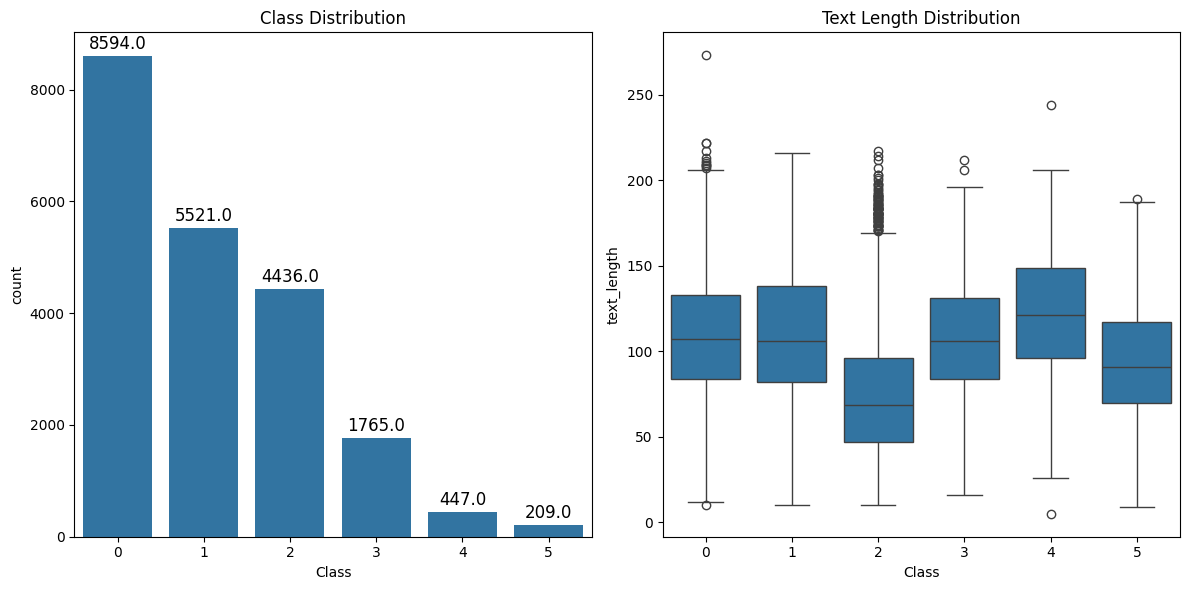

In [29]:
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
ax = sns.countplot(x='Class', data=train_df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Class Distribution')

plt.subplot(1, 2, 2)
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))
sns.boxplot(x='Class', y='text_length', data=train_df)
plt.title('Text Length Distribution')

plt.tight_layout()
plt.show()

In [30]:
q1 = train_df['text_length'].quantile(0.25)
q3 = train_df['text_length'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = train_df[(train_df['text_length'] < lower_bound) | (train_df['text_length'] > upper_bound)]

print(f'Number of outliers: {len(outliers)}')

train_df = train_df[~((train_df['text_length'] < lower_bound) | (train_df['text_length'] > upper_bound))]

Number of outliers: 13


In [31]:
print(f'Number of articles after removing outliers: {len(train_df)}')

Number of articles after removing outliers: 20959


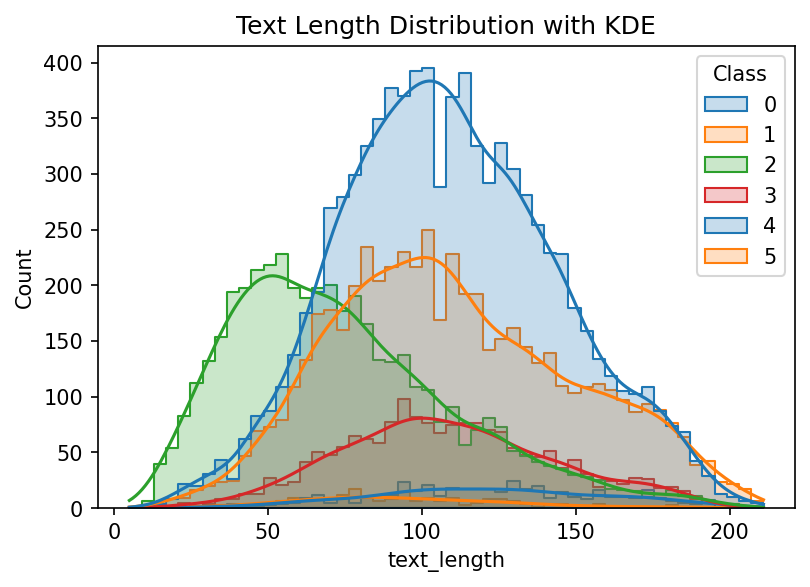

In [32]:
plt.figure(figsize=(6, 4), dpi=150)

sns.histplot(data=train_df, x='text_length', hue='Class', kde=True, element='step', palette = sns.color_palette("tab10", 4))
plt.title('Text Length Distribution with KDE')

plt.show()

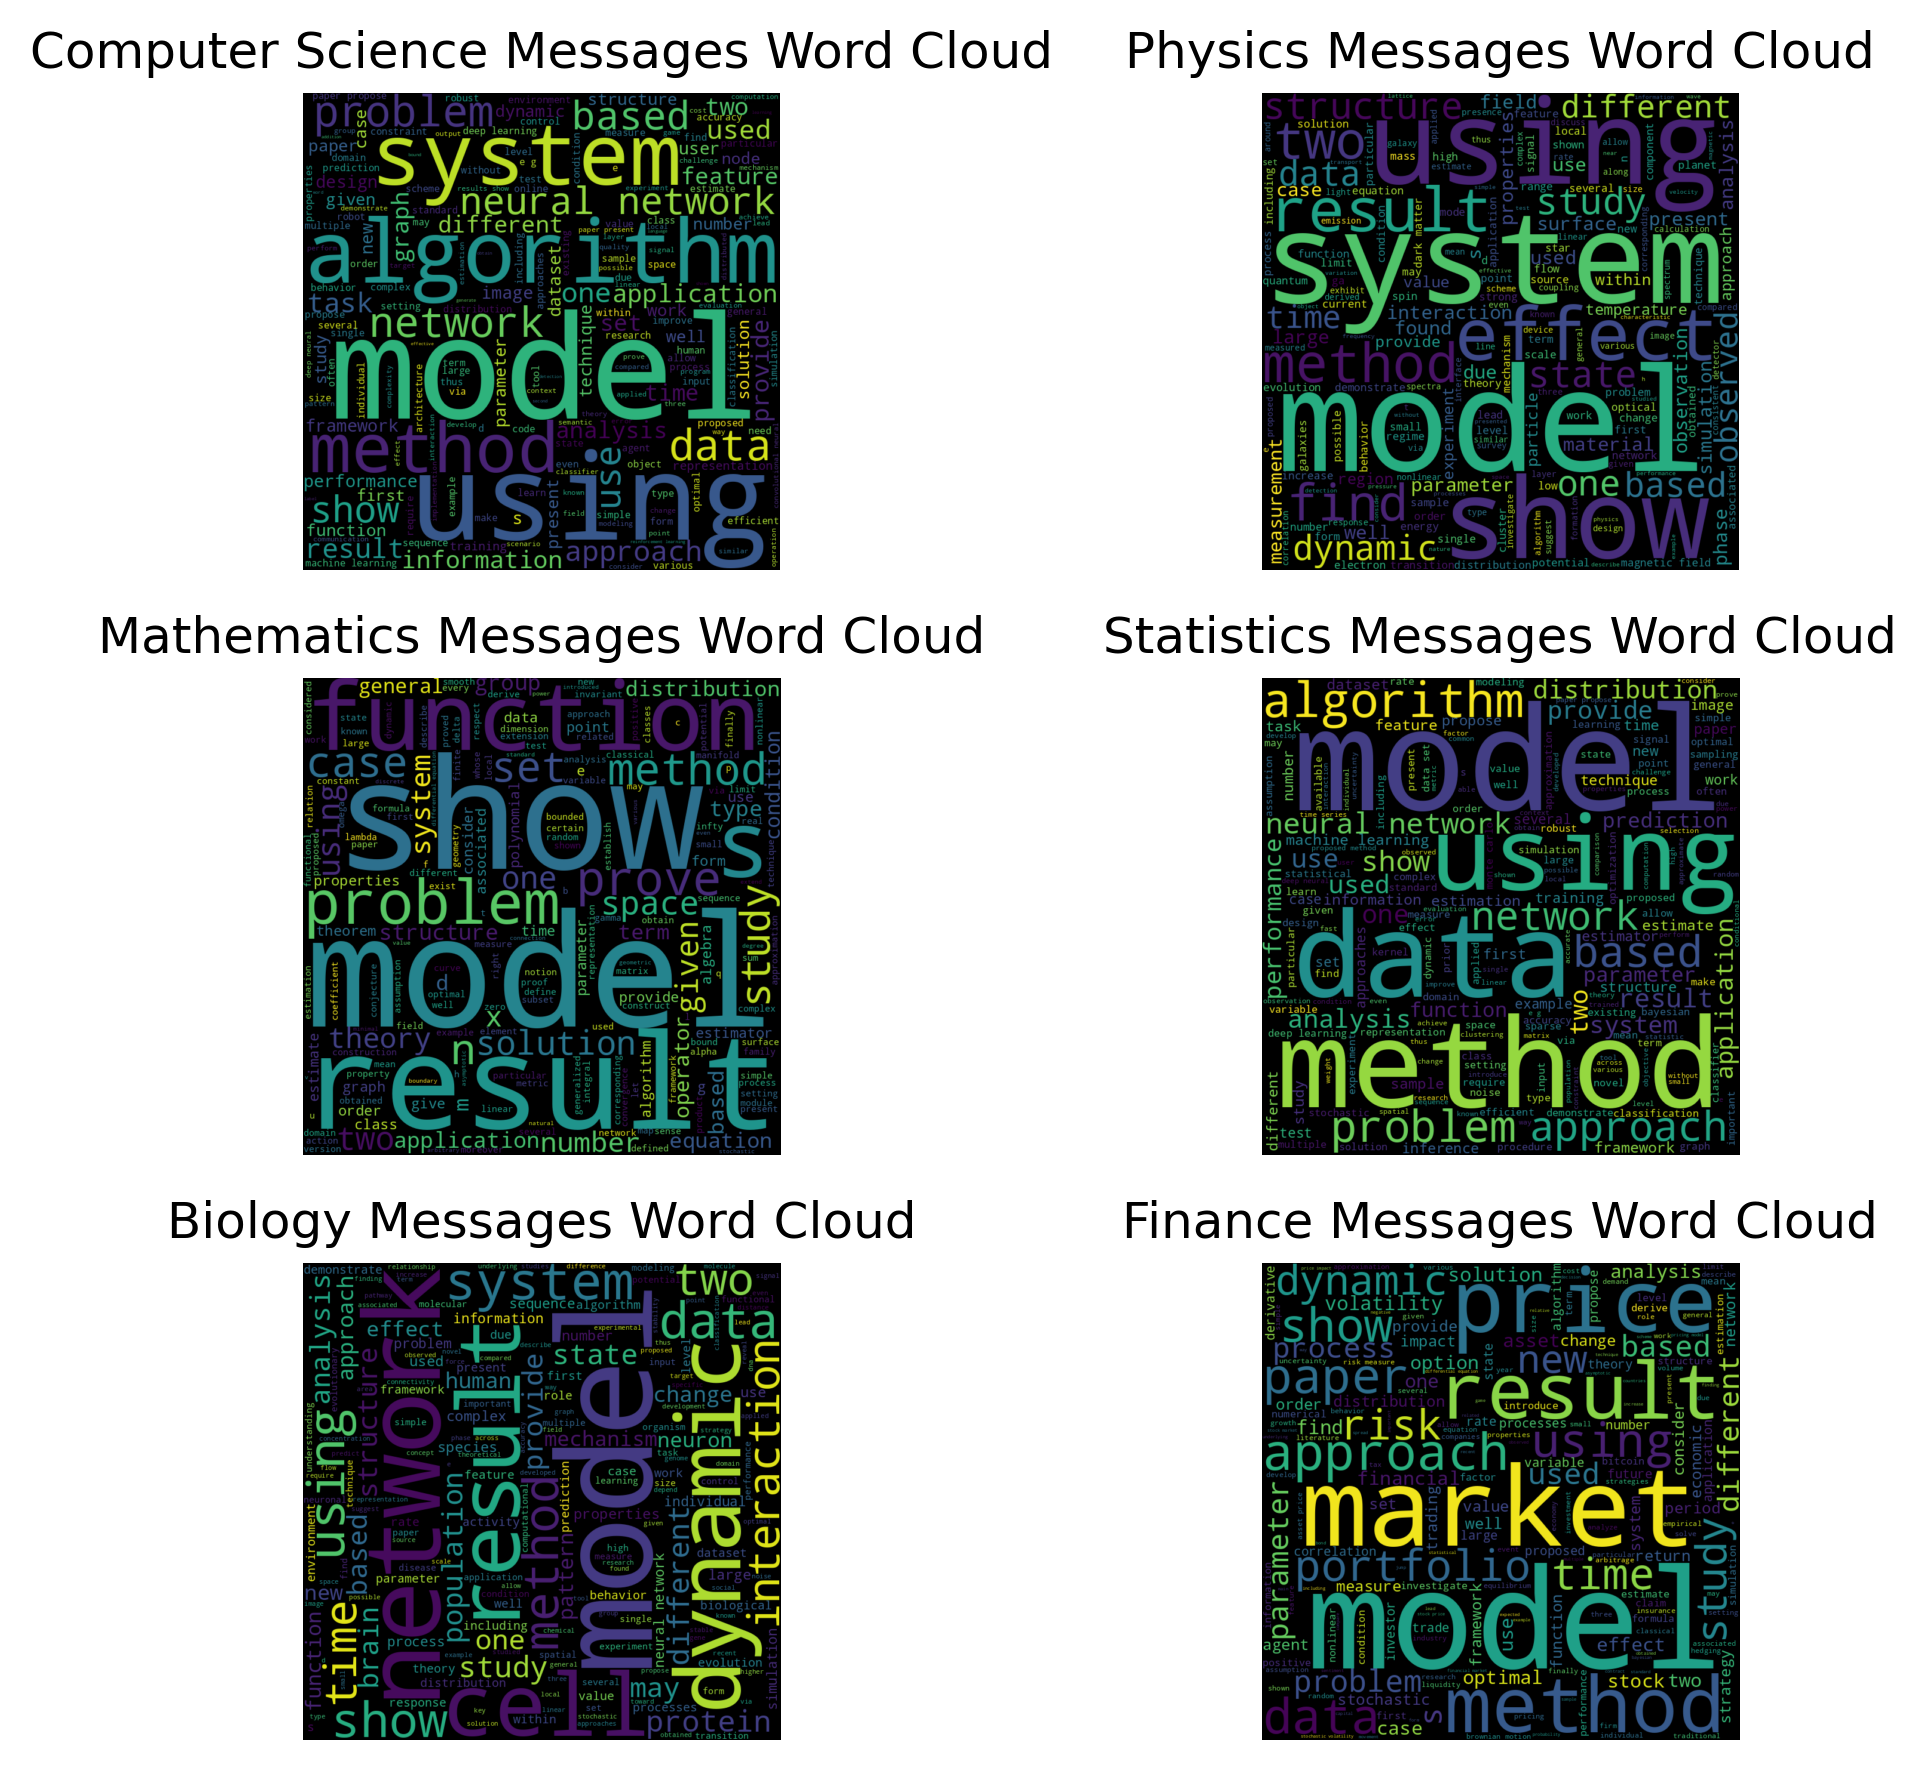

In [33]:
computer_text = " ".join(train_df[train_df['Class'] == 0]['text'])
Physics_text = " ".join(train_df[train_df['Class'] == 1]['text'])
math_text = " ".join(train_df[train_df['Class'] == 2]['text'])
statistics_text = " ".join(train_df[train_df['Class'] == 3]['text'])
bio_text = " ".join(train_df[train_df['Class'] == 4]['text'])
finance_text = " ".join(train_df[train_df['Class'] == 5]['text'])

computer_wordcloud = WordCloud(width=800, height=800).generate(computer_text)
Physics_wordcloud = WordCloud(width=800, height=800).generate(Physics_text)
math_wordcloud = WordCloud(width=800, height=800).generate(math_text)
statistics_wordcloud = WordCloud(width=800, height=800).generate(statistics_text)
bio_wordcloud = WordCloud(width=800, height=800).generate(bio_text)
finance_wordcloud = WordCloud(width=800, height=800).generate(finance_text)

computer_image = computer_wordcloud.to_array()
Physics_image = Physics_wordcloud.to_array()
math_image = math_wordcloud.to_array()
statistics_image = statistics_wordcloud.to_array()
bio_image = bio_wordcloud.to_array()
finance_image = finance_wordcloud.to_array()

plt.figure(figsize=(8, 6), dpi=300)

plt.subplot(3, 2, 1)
plt.imshow(computer_image, interpolation='bilinear')
plt.title('Computer Science Messages Word Cloud')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(Physics_image, interpolation='bilinear')
plt.title('Physics Messages Word Cloud')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(math_image, interpolation='bilinear')
plt.title('Mathematics Messages Word Cloud')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(statistics_image, interpolation='bilinear')
plt.title('Statistics Messages Word Cloud')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(bio_image, interpolation='bilinear')
plt.title('Biology Messages Word Cloud')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(finance_image, interpolation='bilinear')
plt.title('Finance Messages Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [34]:
train_df.drop(columns=['num_words', 'text_length'], axis=1, inplace=True)
train_df

,Class,text
0,0,reconstructing subjectspecific effect maps pre...
1,0,rotation invariance neural network rotation in...
2,2,spherical polyharmonics poisson kernels polyha...
3,2,finite element approximation stochastic maxwel...
4,0,comparative study discrete wavelet transforms ...
...,...,...
20967,0,contemporary machine learning guide practition...
20968,1,uniform diamond coatings wcco hard alloy cutti...
20969,0,analysing soccer games clustering conceptors w...
20970,2,on efficient simulation lefttail sum correlate...


In [35]:
test_df.drop(columns=['num_words'], axis=1, inplace=True)
test_df.head()

,text
0,closedform marginal likelihood gammapoisson ma...
1,laboratory midir spectra equilibrated igneous ...
2,case for static amsdu aggregation wlans frame ...
3,the gaiaeso survey inner disk intermediateage ...
4,witnessfunctions versus interpretationfunction...


In [36]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = TFAutoModel.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [37]:
x_train, x_val, y_train, y_val = train_test_split(train_df.text, train_df.Class, test_size=0.2, random_state=42)

In [38]:
def extract_transformer_features(texts, max_length=128, batch_size=16):

    features = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i: i + batch_size]
        encodings = tokenizer(
            text=batch_texts,
            max_length=max_length,
            padding=True,
            truncation=True,
            return_tensors="tf",
            return_attention_mask=True,
            return_token_type_ids=False
        )
        outputs = model(encodings)
        batch_features = outputs.last_hidden_state[:, 0, :].numpy()
        features.append(batch_features)
    return np.concatenate(features, axis=0)

X_train_transformer = extract_transformer_features(x_train.tolist())
X_val_transformer = extract_transformer_features(x_val.tolist())

X_test_transformer = extract_transformer_features(test_df['text'].tolist())

In [39]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(x_train).toarray()
X_val_tfidf = vectorizer.transform(x_val).toarray()

X_test_tfidf = vectorizer.transform(test_df['text']).toarray()

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_transformer_scaled = scaler.fit_transform(X_train_transformer)
X_val_transformer_scaled = scaler.transform(X_val_transformer)

X_test_scaled = scaler.transform(X_test_transformer)


X_train_combined = np.hstack((X_train_transformer_scaled, X_train_tfidf))
X_val_combined = np.hstack((X_val_transformer_scaled, X_val_tfidf))

X_test_combined = np.hstack((X_test_scaled, X_test_tfidf))

In [45]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# model = MultinomialNB()
model.fit(X_train_combined, y_train)

y_pred = model.predict(X_val_combined)
accuracy = accuracy_score(y_val, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))

Accuracy: 0.7576
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1763
           1       0.89      0.84      0.87      1123
           2       0.78      0.71      0.74       843
           3       0.50      0.01      0.02       340
           4       1.00      0.01      0.02        83
           5       0.00      0.00      0.00        40

    accuracy                           0.76      4192
   macro avg       0.64      0.42      0.41      4192
weighted avg       0.75      0.76      0.72      4192



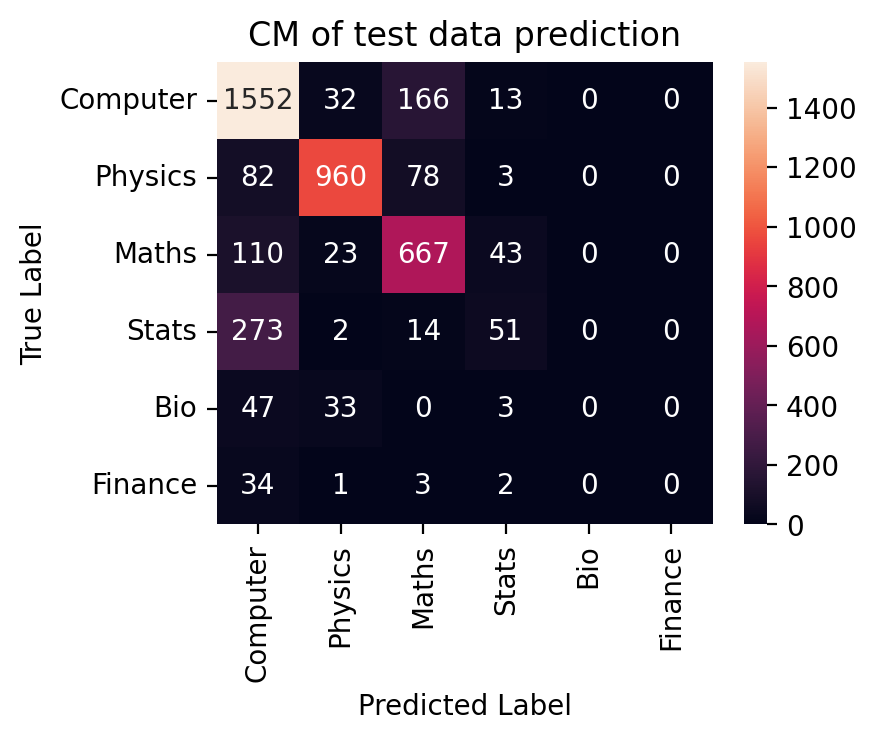

In [43]:
conf_matrix = confusion_matrix(y_val, y_pred)
labels =['Computer', 'Physics', 'Maths', 'Stats', 'Bio', 'Finance']
plt.figure(figsize=(4, 3), dpi=200)
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.title('CM of test data prediction')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [46]:
x_test_pred = model.predict(X_test_combined)
test_df['PREDICTED_SECTION'] = x_test_pred

print(test_df[['text', 'PREDICTED_SECTION']])

                                                   text  PREDICTED_SECTION
0     closedform marginal likelihood gammapoisson ma...                  0
1     laboratory midir spectra equilibrated igneous ...                  1
2     case for static amsdu aggregation wlans frame ...                  0
3     the gaiaeso survey inner disk intermediateage ...                  1
4     witnessfunctions versus interpretationfunction...                  0
...                                                 ...                ...
8984  supporting mixeddatatype matrix multiplication...                  0
8985  an axiomatic basis blackwell optimality in the...                  2
8986  genevis an interactive visualization tool comb...                  0
8987  quantifying causal effect speed cameras road t...                  0
8988  cubemagic labelings grids we show vertices edg...                  2

[8989 rows x 2 columns]
